In [35]:
import deep_predictor
from collections.abc import Mapping
import torch
import scanpy as sc
import numpy as np
import pandas as pd

In [36]:
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
sc.set_figure_params(dpi=250, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
import pandas as pd

In [37]:
adata = sc.read("/home/gaurav/Gaurav/Berlin/Deep_Learning/Experiment/PCA_UMAP/VAE_models/VAE_models/normalised_model/farrel_normalised.h5ad")
annotations = pd.read_csv("/home/gaurav/Gaurav/Berlin/Deep_Learning/Experiment/PCA_UMAP/VAE_models/VAE_models/normalised_model/cell_metadata.csv",index_col = ["Unnamed: 0"])
adata.obs["Annotations"] = annotations["Annotations"]

In [38]:
# Single cells training Data
#segments = [8,61,19,64,2,59,50,70,56,16,69,60,1,10,55,57,53]
#training_data = adata[adata.obs['segment'] == 72]
#training_data = training_data[training_data.obs['HPF'] == 5.3]
#for segment in segments:
#    segment_data = adata[adata.obs['segment'] == segment]
#    segment_data = segment_data[segment_data.obs['HPF'] == 12]
#    training_data = training_data.concatenate(segment_data)
#training_data.obs["cells"] = "Training data"

In [39]:
#Training Data
#Meso/Endo
#segments = [74,71,3,34,12,75,62,52,58,73,17,26,76,5,18]
#training_data = adata[adata.obs['segment'] == 78]
#training_data = training_data[training_data.obs['HPF'] == 5.3]
#for segment in segments:
#    segment_data = adata[adata.obs['segment'] == segment]
#    segment_data = segment_data[segment_data.obs['HPF'] == 12]
#    training_data = training_data.concatenate(segment_data)
#
#training_data.obs["cells"] = "Training data"

In [512]:
# Starting data 
progenitors_data = adata[adata.obs['segment'] == 72]
progenitors_data = progenitors_data[progenitors_data.obs['HPF'] == 5.3]

In [513]:
# Downsampling Starting data
random_index = np.random.choice(np.arange(0,np.shape(progenitors_data)[0]),900)
downsampled_proge_data = progenitors_data[random_index]

In [514]:
# Terminal data 
#maturecell_data = adata[adata.obs['segment'] == 57]
#maturecell_data = maturecell_data[maturecell_data.obs['HPF'] == 12]
#random_index = np.random.choice(np.arange(0,np.shape(maturecell_data)[0]),300)
#upsampled_mature_data = maturecell_data[random_index]

In [515]:
segments = [8,56]
maturecell_data = adata[adata.obs['segment'] == 57]
maturecell_data = maturecell_data[maturecell_data.obs['HPF'] == 12]
random_index = np.random.choice(np.arange(0,np.shape(maturecell_data)[0]),300)
maturecell_data = maturecell_data[random_index]
for segment in segments:
    segment_data = adata[adata.obs['segment'] == segment]
    segment_data = segment_data[segment_data.obs['HPF'] == 12]
    random_index = np.random.choice(np.arange(0,np.shape(segment_data)[0]),300)
    segment_data = segment_data[random_index]
    maturecell_data = maturecell_data.concatenate(segment_data)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observatio

In [521]:
training_data = downsampled_proge_data.concatenate(maturecell_data)
training_data.obs["cells"] = "Training data"

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [524]:
zebra_obj = deep_predictor.DeepPredictor(training_data,latent_dim=100,hidden_layers=[800,800],workers=8,parameters=[0,0,1,0,1],likelihood="nb",batch_size=100)

In [525]:
zebra_obj.train(epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type     | Params
-----------------------------------
0 | model | VAEmodel | 29.1 M
-----------------------------------
29.1 M    Trainable params
0         Non-trainable params
29.1 M    Total params
116.567   Total estimated model params size (MB)
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (18) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [658]:
Test_data = adata[adata.obs['segment'] == 78]
Test_data = Test_data[Test_data.obs['HPF'] == 5.3]
Test_data.obs["cells"] = "Test data"


/tmp/ipykernel_6693/810942141.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Test_data.obs["cells"] = "Test data"


In [659]:
#downsampled 
random_index = np.random.choice(np.arange(0,np.shape(Test_data)[0]),300)
downsampled_test_data = Test_data[random_index]

In [660]:
Real_data = adata[adata.obs['segment'] == 5]
Real_data = Real_data[Real_data.obs['HPF'] == 12]
Real_data.obs["cells"] = "Real data"
random_index = np.random.choice(np.arange(0,np.shape(Real_data)[0]),300)
Real_data = Real_data[random_index]

/tmp/ipykernel_6693/653522489.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Real_data.obs["cells"] = "Real data"


In [529]:
segments = [3,58]
Real_data = adata[adata.obs['segment'] == 5]
Real_data = Real_data[Real_data.obs['HPF'] == 12]
random_index = np.random.choice(np.arange(0,np.shape(Real_data)[0]),300)
Real_data = Real_data[random_index]
for segment in segments:
    segment_data = adata[adata.obs['segment'] == segment]
    segment_data = segment_data[segment_data.obs['HPF'] == 12]
    random_index = np.random.choice(np.arange(0,np.shape(segment_data)[0]),300)
    segment_data = segment_data[random_index]
    Real_data = Real_data.concatenate(segment_data)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observatio

In [661]:
Real_data.obs["cells"] = "Real data"

/tmp/ipykernel_6693/3767986869.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Real_data.obs["cells"] = "Real data"
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [662]:
adata_test = Real_data.concatenate(downsampled_test_data)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [663]:
zebra_obj.runFlows(5.3,12,"HPF")

In [664]:
zebra_obj.trainFlows(iterations=200)

Loss (it. 0) : 23.027290
Loss (it. 10) : 22.612675
Loss (it. 20) : 21.693133
Loss (it. 30) : 20.130466
Loss (it. 40) : 18.066289
Loss (it. 50) : 15.744632
Loss (it. 60) : 13.539736
Loss (it. 70) : 11.476307
Loss (it. 80) : 9.624911
Loss (it. 90) : 7.966860
Loss (it. 100) : 6.467902
Loss (it. 110) : 5.164670
Loss (it. 120) : 3.996958
Loss (it. 130) : 2.683647
Loss (it. 140) : 1.662445
Loss (it. 150) : 0.616310
Loss (it. 160) : -0.078706
Loss (it. 170) : -1.110424
Loss (it. 180) : -2.043479
Loss (it. 190) : -2.663552


In [665]:
adata_single_ecto_forward,px_scale,theta,px_rate = zebra_obj.predict(adata_test,5.3,12,"HPF")


/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [666]:
px_scale.shape

(300, 17238)

In [667]:
pca_pal = ["#d62728","#ff7f0e","#1f77b4"]

In [668]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



def corrfunc(x, y, **kws):
	slope, intercept, r, p_value, _err = stats.linregress(x, y)
	ax = plt.gca()
	ax.annotate("$R^2$ = {:.2f}".format(r**2),
				xy=(.1, .9), xycoords=ax.transAxes)


def Plotting_Correlation_genes(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0, 100,20)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    #plt.xlim(0,80) 
    #plt.ylim(0,80)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()
    
def Plotting_Correlation_var(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0, 40,5)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    sns.despine(offset=2)
    plt.xlim(-1,25) 
    plt.ylim(-1,25)
    plt.grid(False)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)
    plt.show()
    
def Plotting_Correlation_var_log(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.std(real_data.X,axis = 0),np.std(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0,1,0.2)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xlim(-0.1,1) 
    plt.ylim(-0.1,1)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show() 
    
def Plotting_Correlation_genes_log(data_object,title,scatter_color):
    real_data = data_object[data_object.obs["cells"] == "Real data",:]
    pred_data =  data_object[data_object.obs["cells"] == "Predicted data",:] 
    scanpy_obj_data = np.vstack((np.average(real_data.X,axis = 0),np.average(pred_data.X,axis = 0)))
    X = "Real data"
    Y = "Predicted data"
    scanpy_obj_data_df = pd.DataFrame(scanpy_obj_data.T,columns=[X,Y])
    corrfunc(scanpy_obj_data[0],scanpy_obj_data[1])
    ax = sns.regplot(data = scanpy_obj_data_df,x = X ,y = Y,scatter=True,scatter_kws={'s':10},marker = "o",color=scatter_color)
    major_ticks = np.arange(0,5,2)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    plt.xlim(0,5) 
    plt.ylim(0,5)
    plt.grid(False)
    sns.despine(offset=5)
    plt.xlabel(X,fontsize = 20)
    plt.ylabel(Y,fontsize = 20)    
    plt.tick_params(labelsize=20)
    plt.title(title,fontsize = 20)   
    plt.show()    

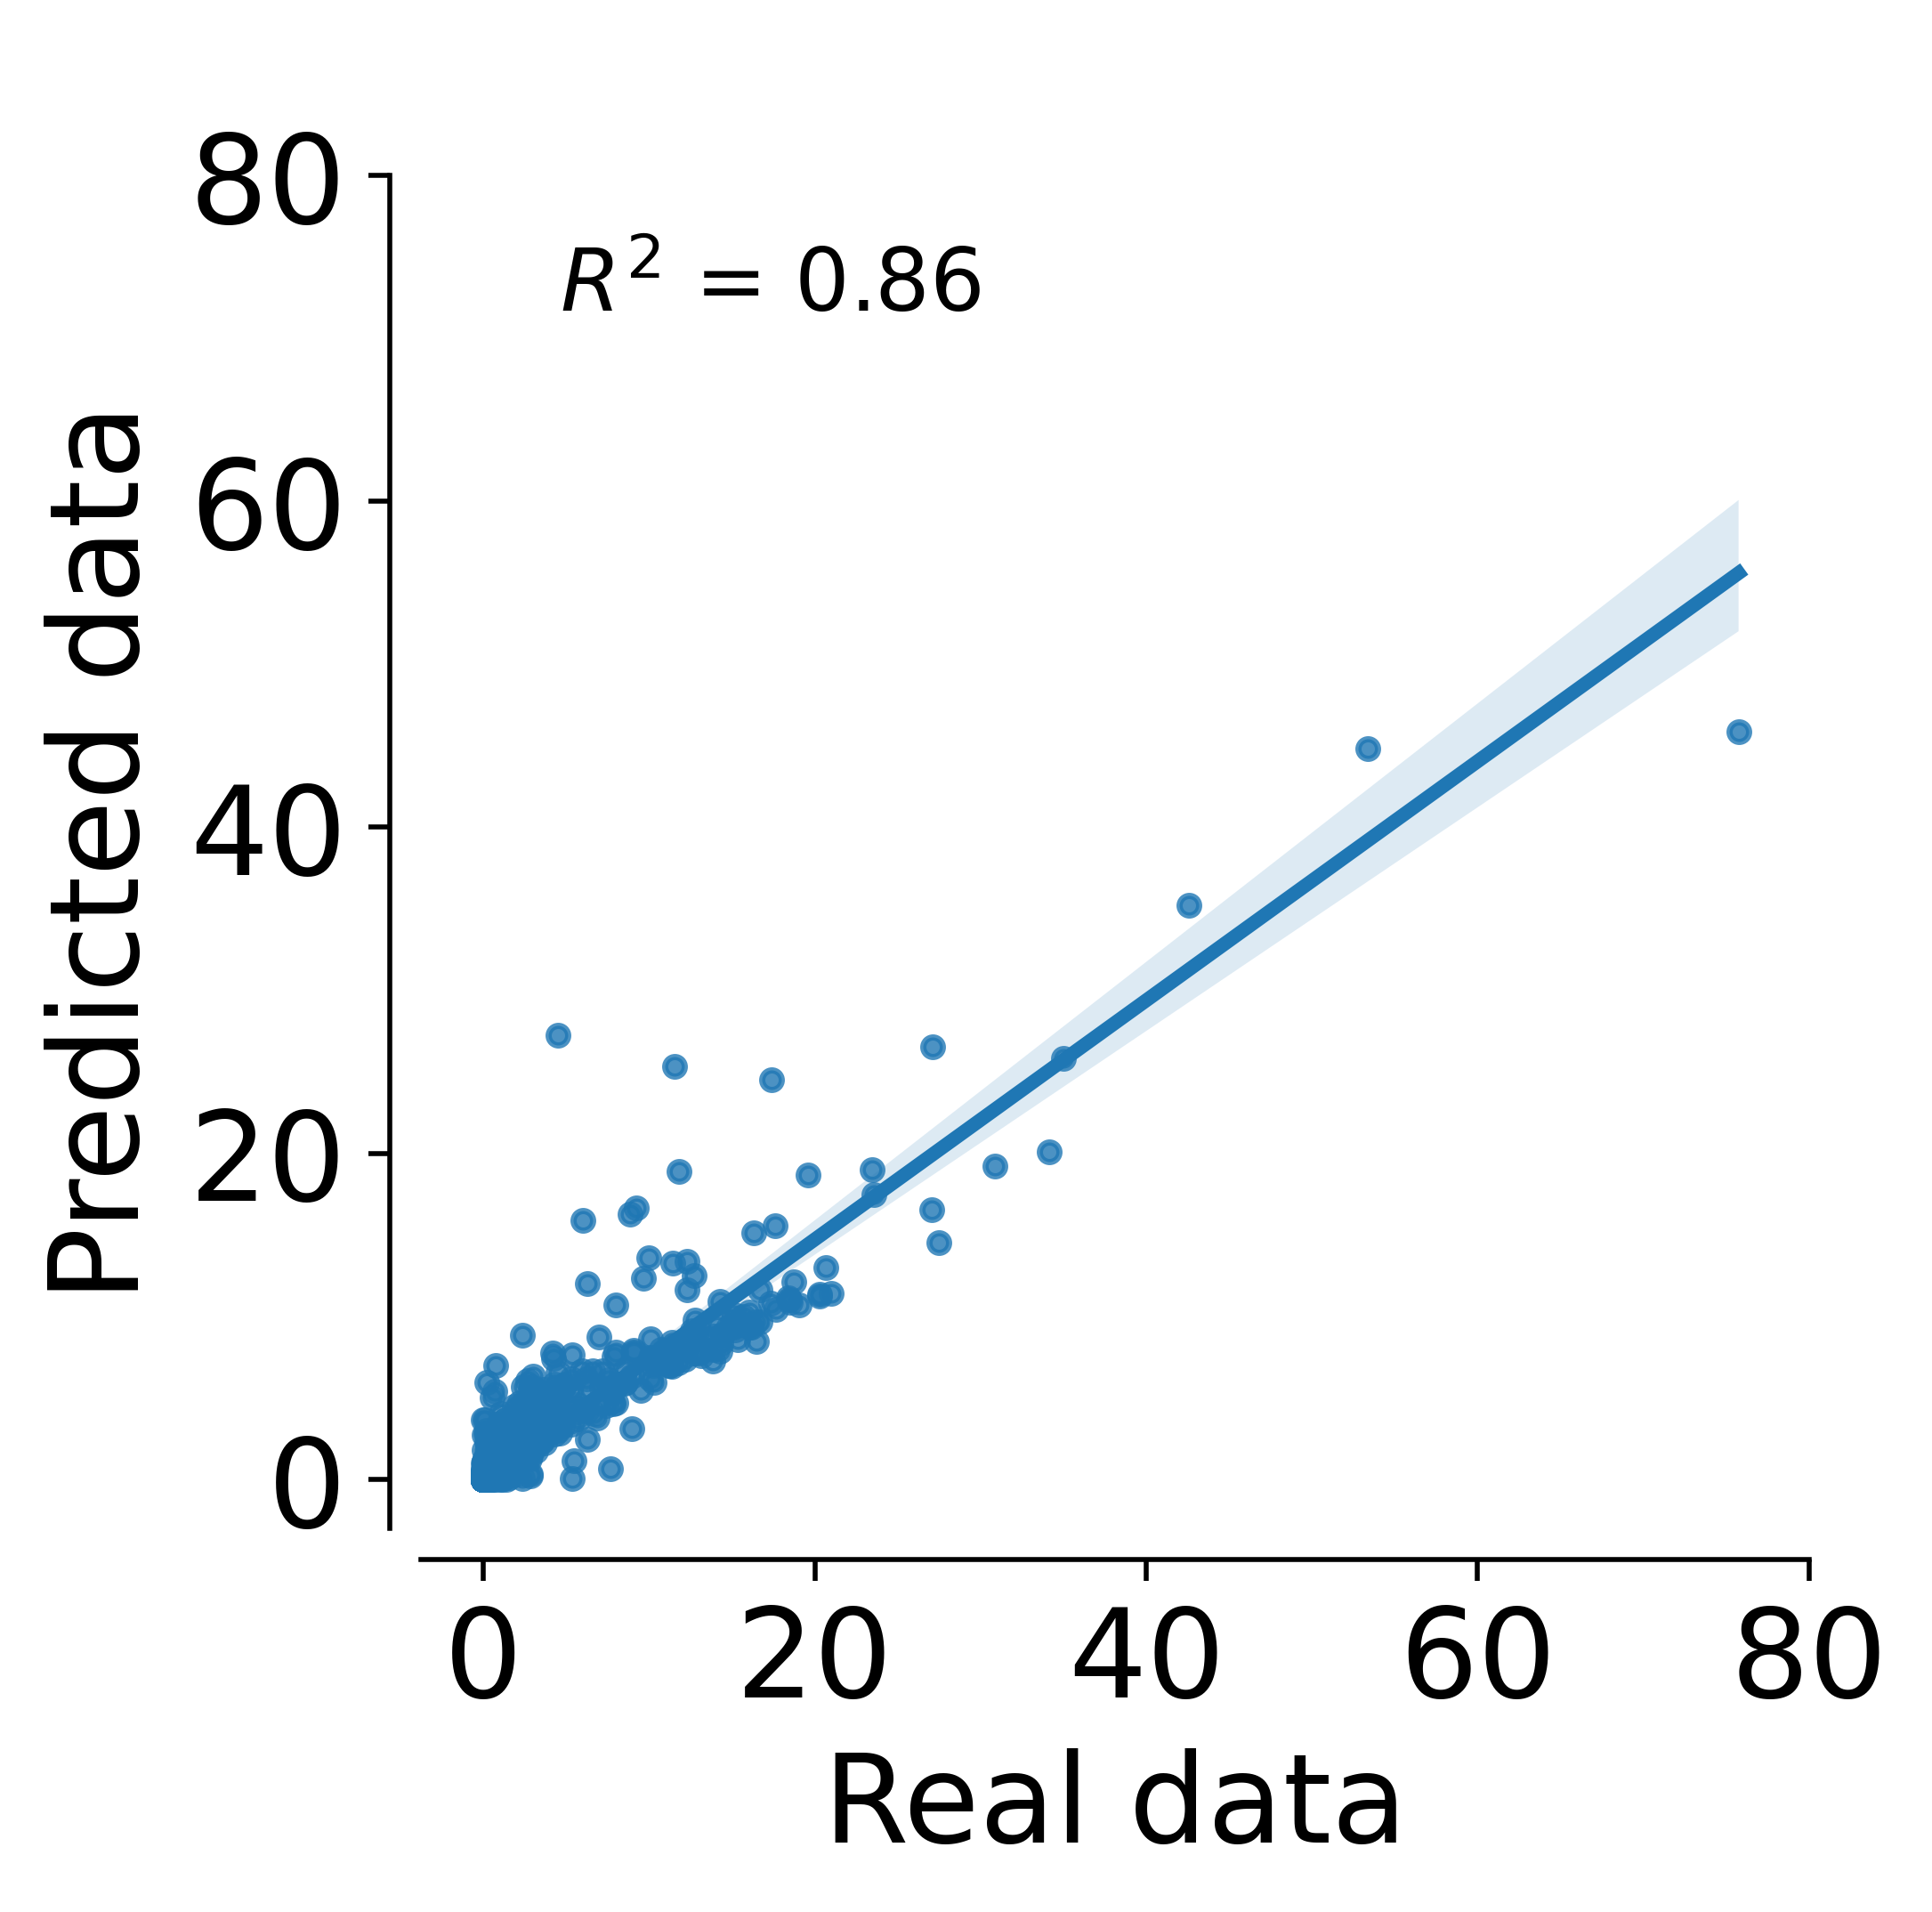

In [669]:
Plotting_Correlation_genes(adata_single_ecto_forward," ",pca_pal[2])


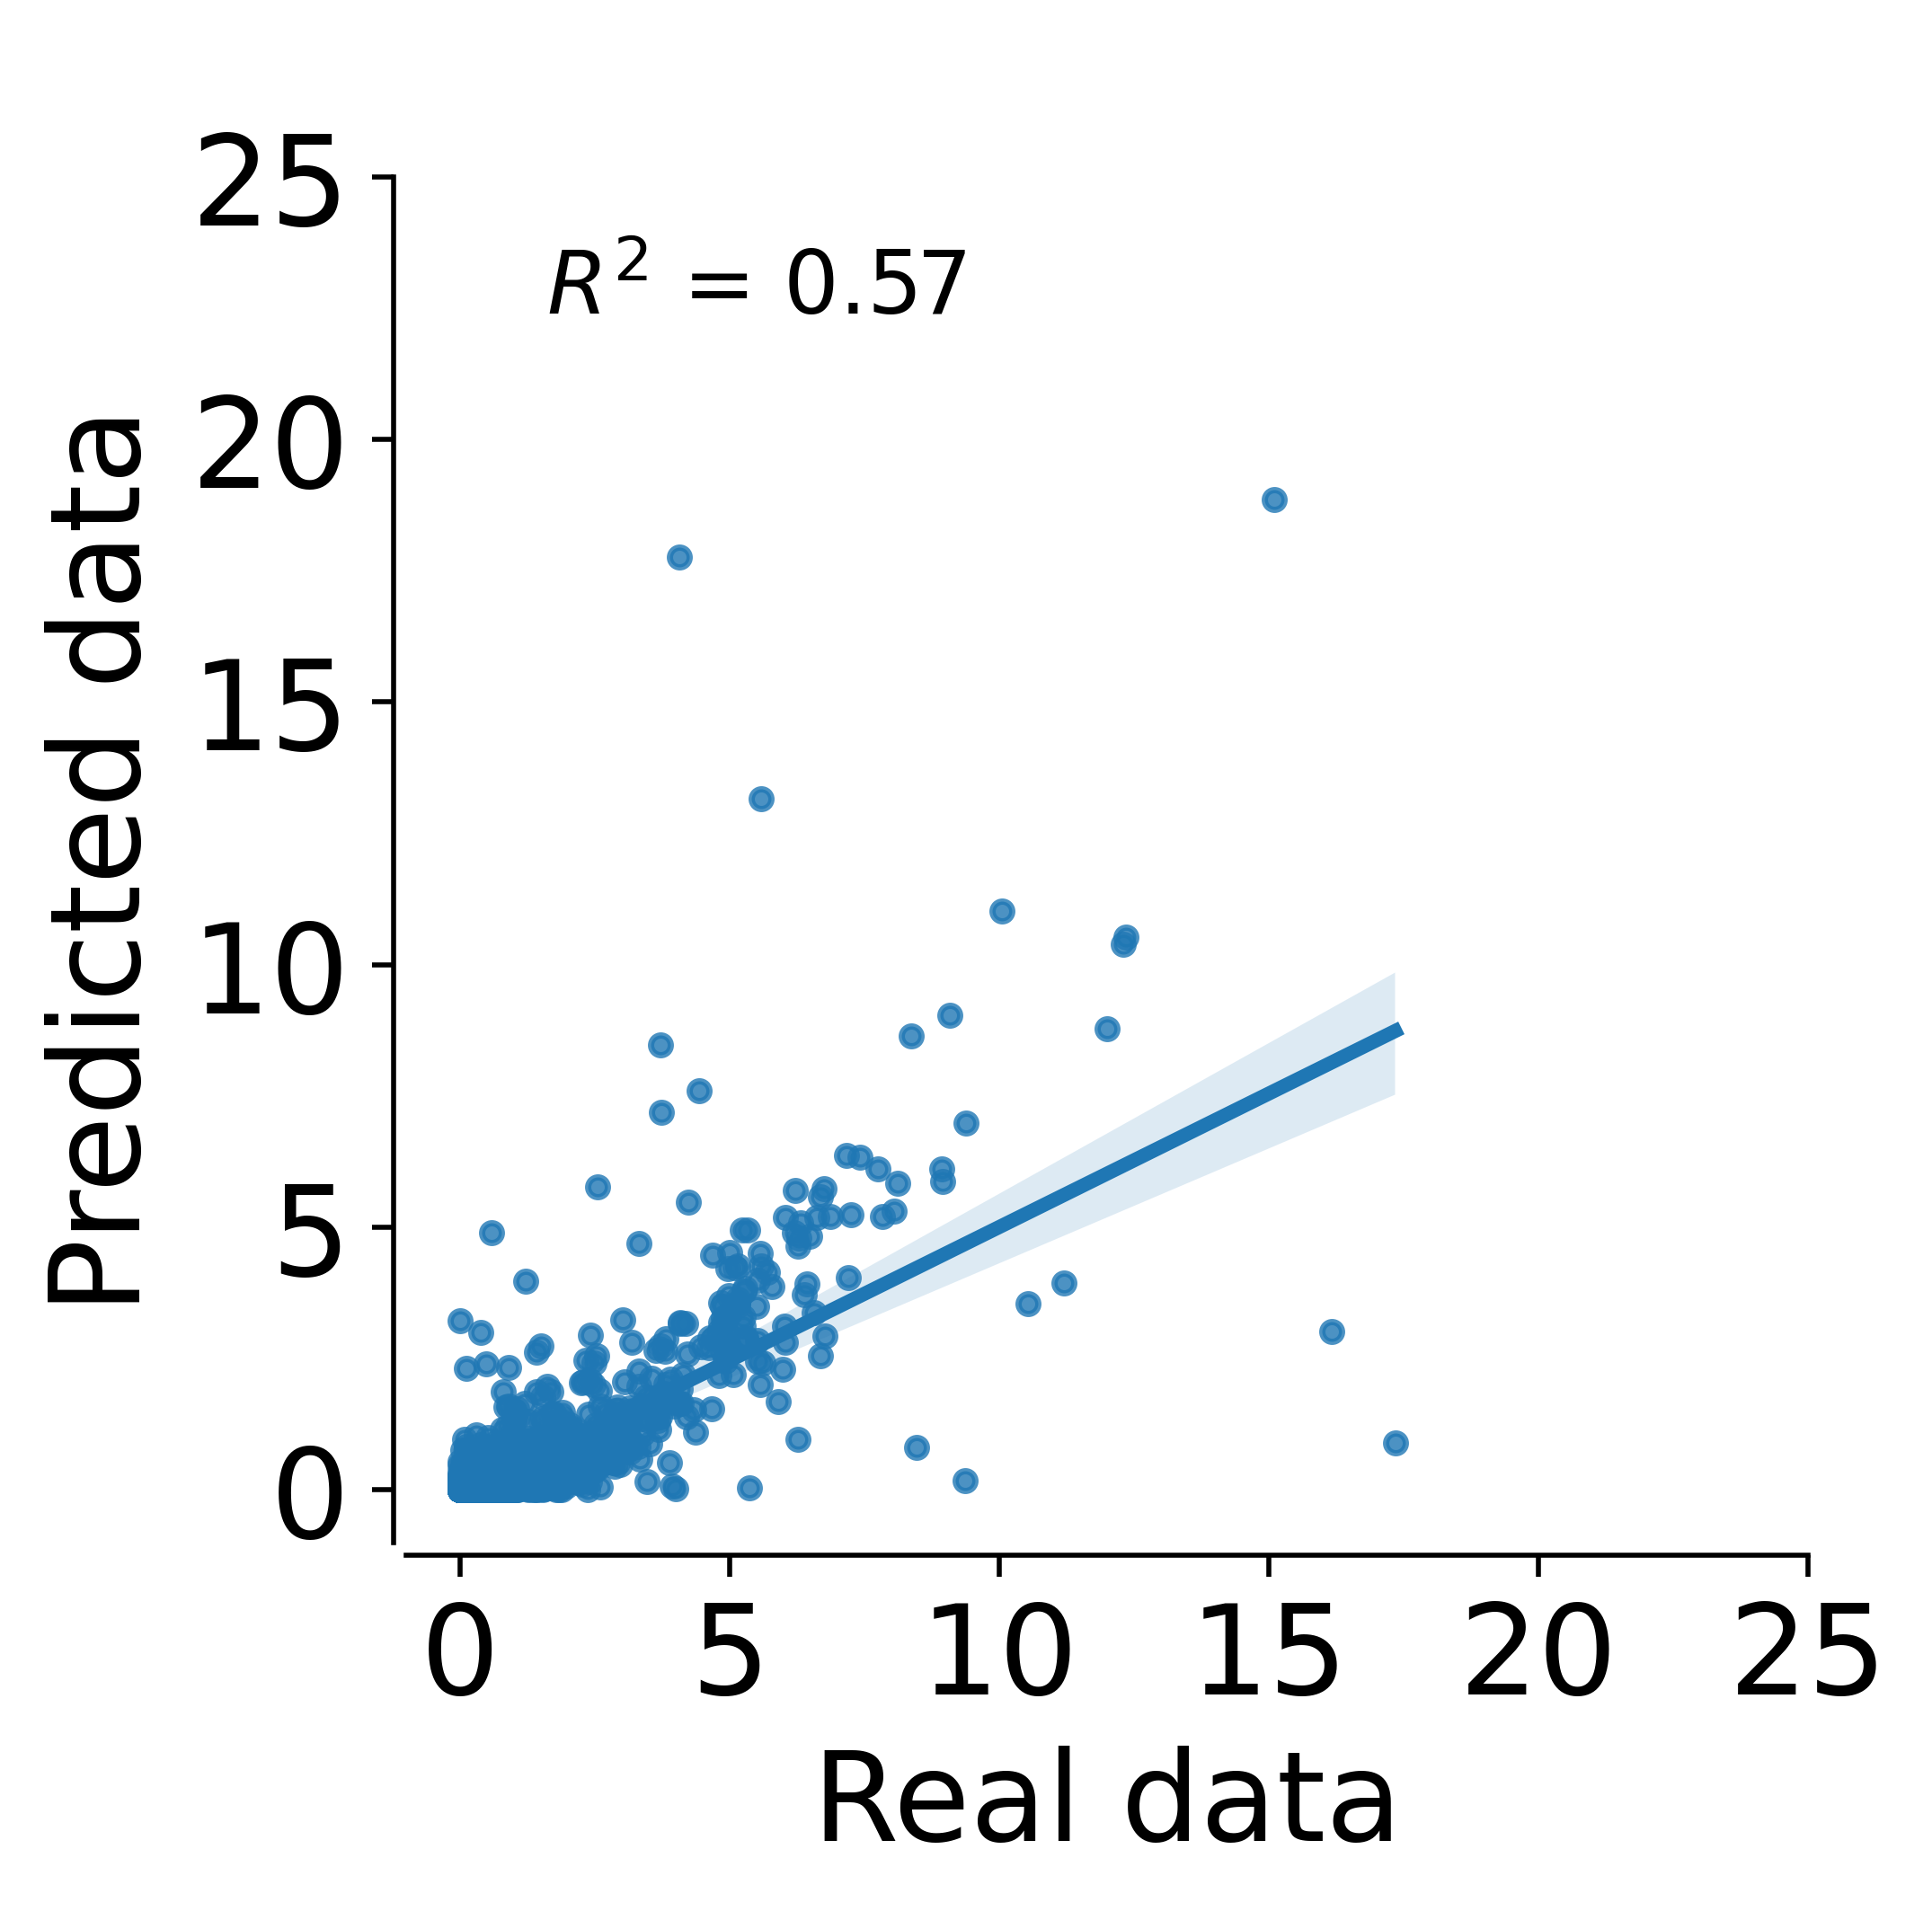

In [670]:
Plotting_Correlation_var(adata_single_ecto_forward," ",pca_pal[2])


In [671]:
def Calculating_PCA(data_object):
	sc.tl.pca(data_object)
    
pca_pal_ = ["#1f77b4","grey","darkgrey"]

In [672]:
Calculating_PCA(adata_single_ecto_forward)


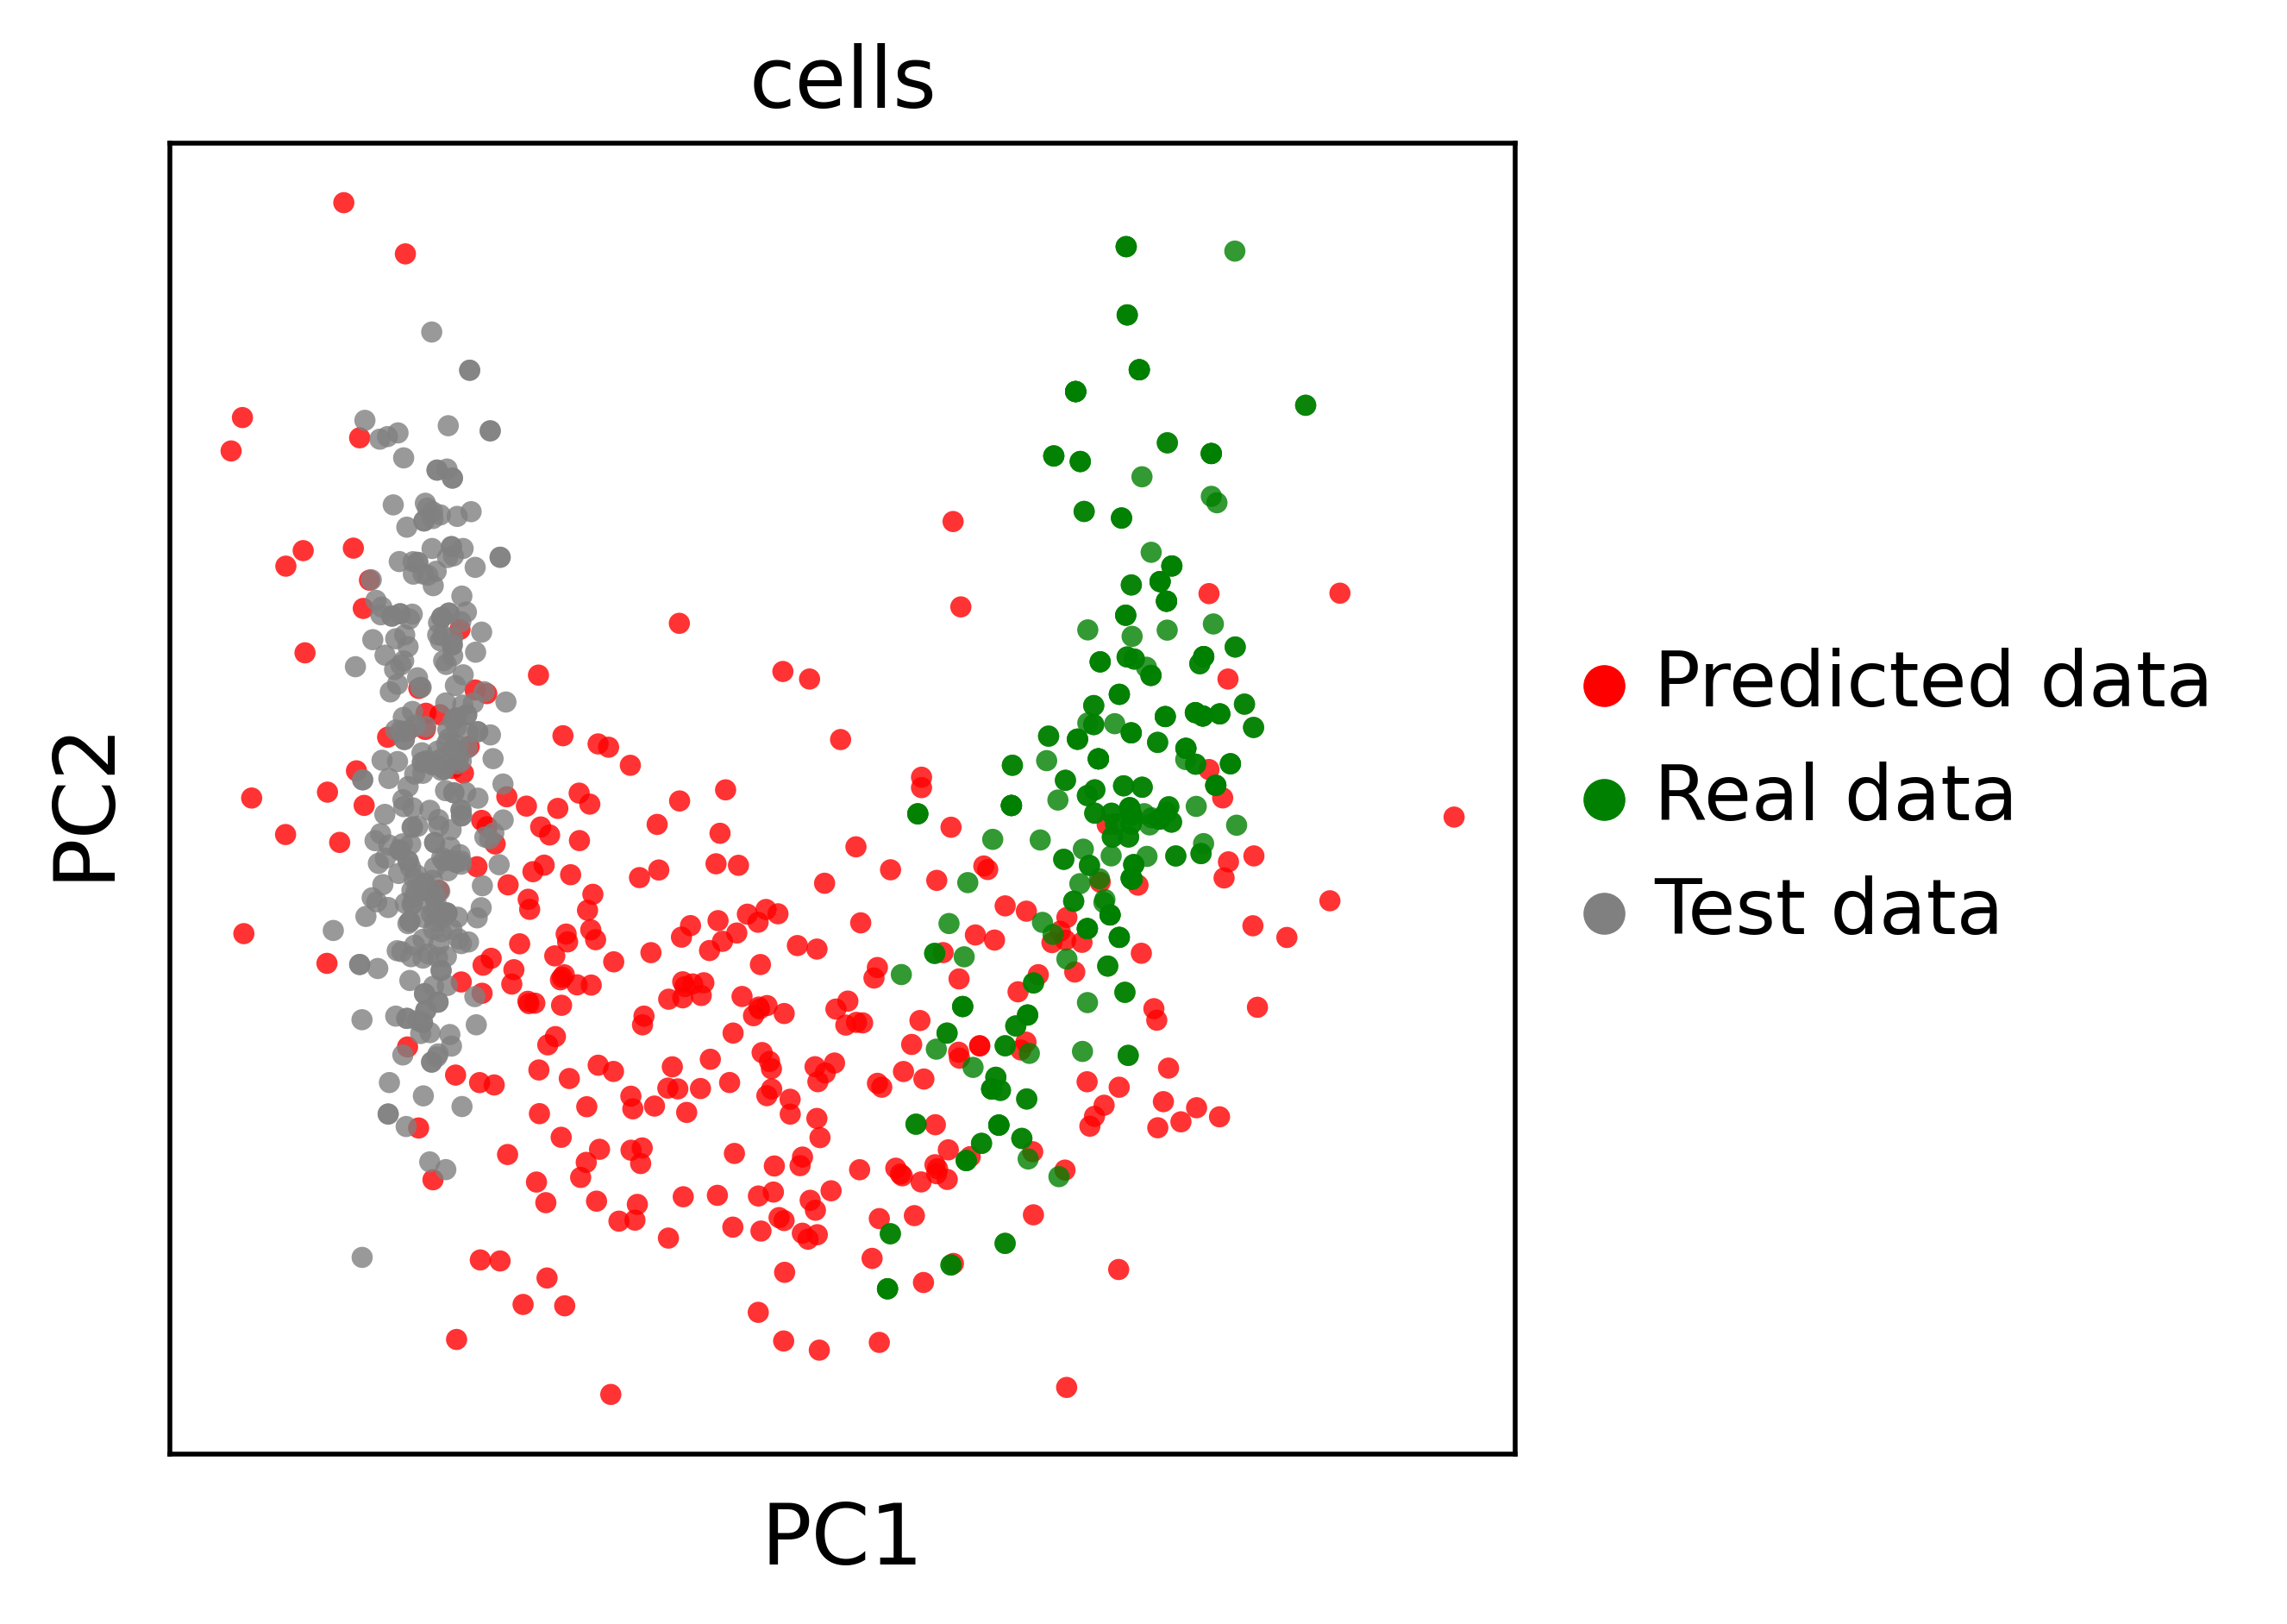

In [673]:
sc.pl.pca(adata_single_ecto_forward, color="cells",size=50,alpha = 0.8,palette=["red","green","gray"])

In [674]:
sc.pp.neighbors(adata_single_ecto_forward)
sc.tl.umap(adata_single_ecto_forward)

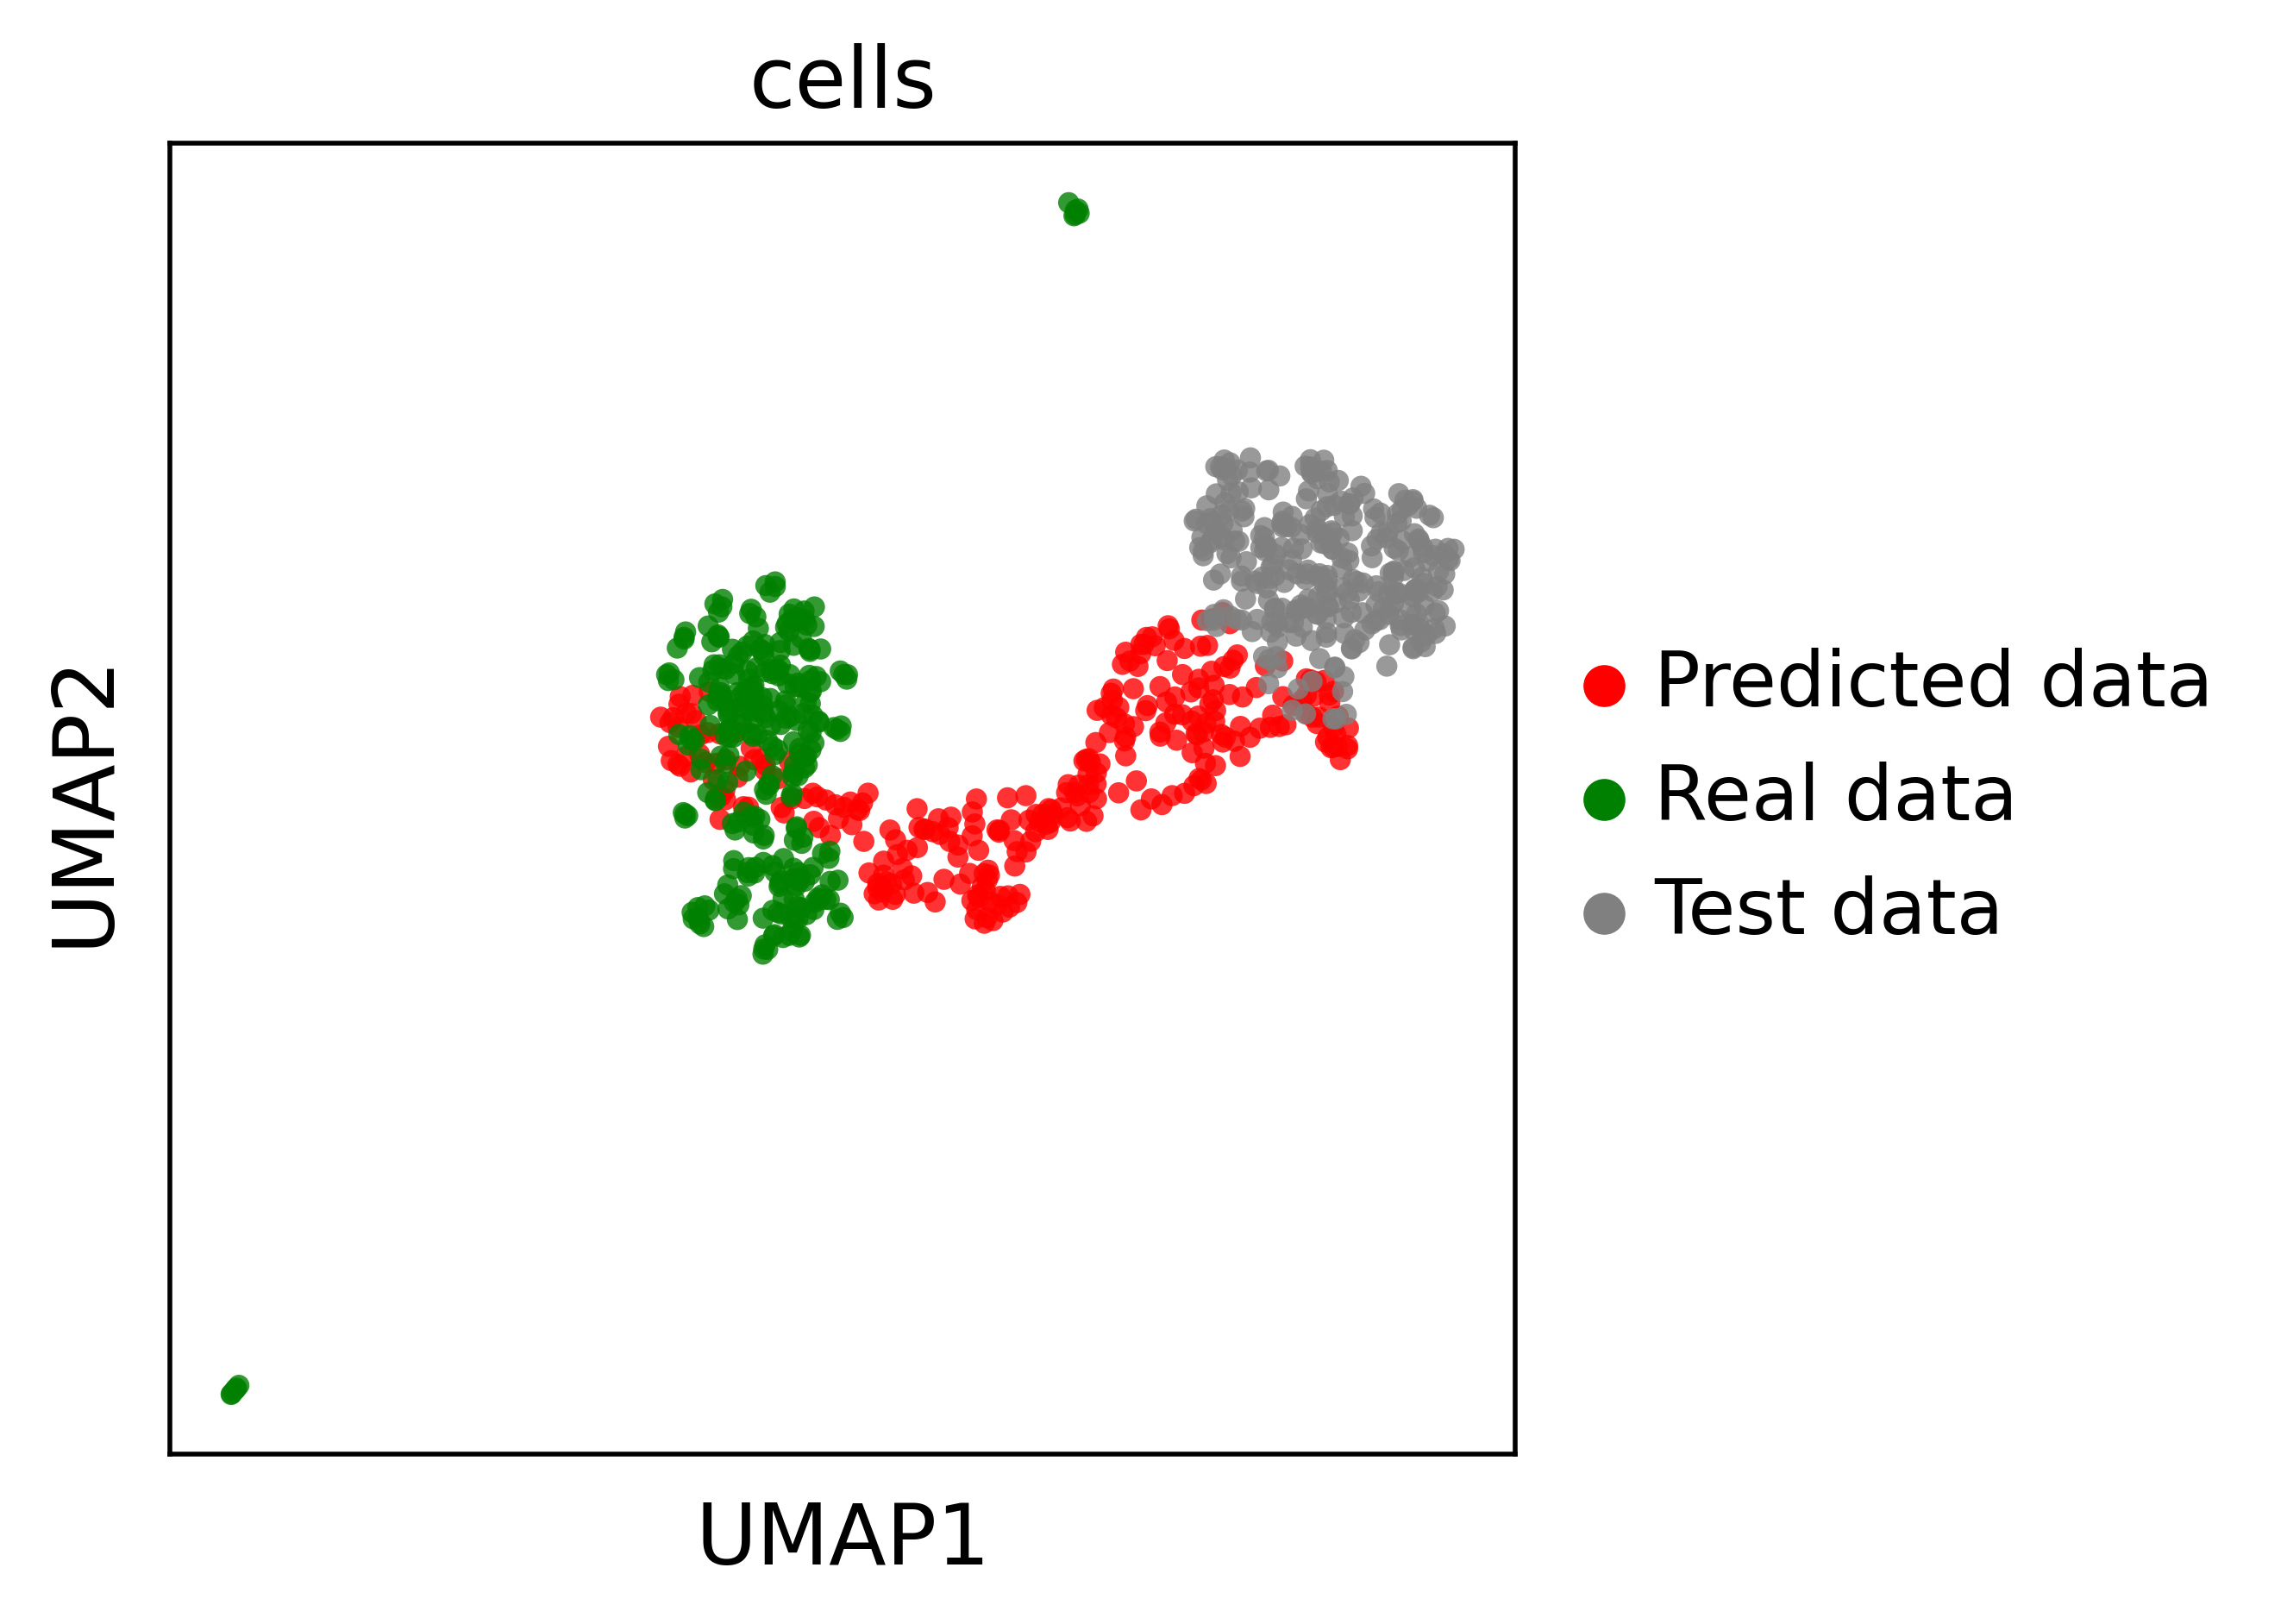

In [675]:
sc.pl.umap(adata_single_ecto_forward,color="cells",size=50,alpha = 0.8,palette=["red","green","gray"])

In [676]:
def euclidean_distance(X, Y):
    m, d = X.shape
    n, _ = Y.shape
    distances = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            distances[i, j] = np.sqrt(np.sum((X[i] - Y[j])**2))
    return distances

In [677]:
predicted_data = adata_single_ecto_forward[adata_single_ecto_forward.obs["cells"] == "Predicted data"]
Real_data = adata_single_ecto_forward[adata_single_ecto_forward.obs["cells"] == "Real data"]


In [678]:
Distance_P_R = euclidean_distance(predicted_data.X,Real_data.X)

/home/gaurav/anaconda3/envs/project/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


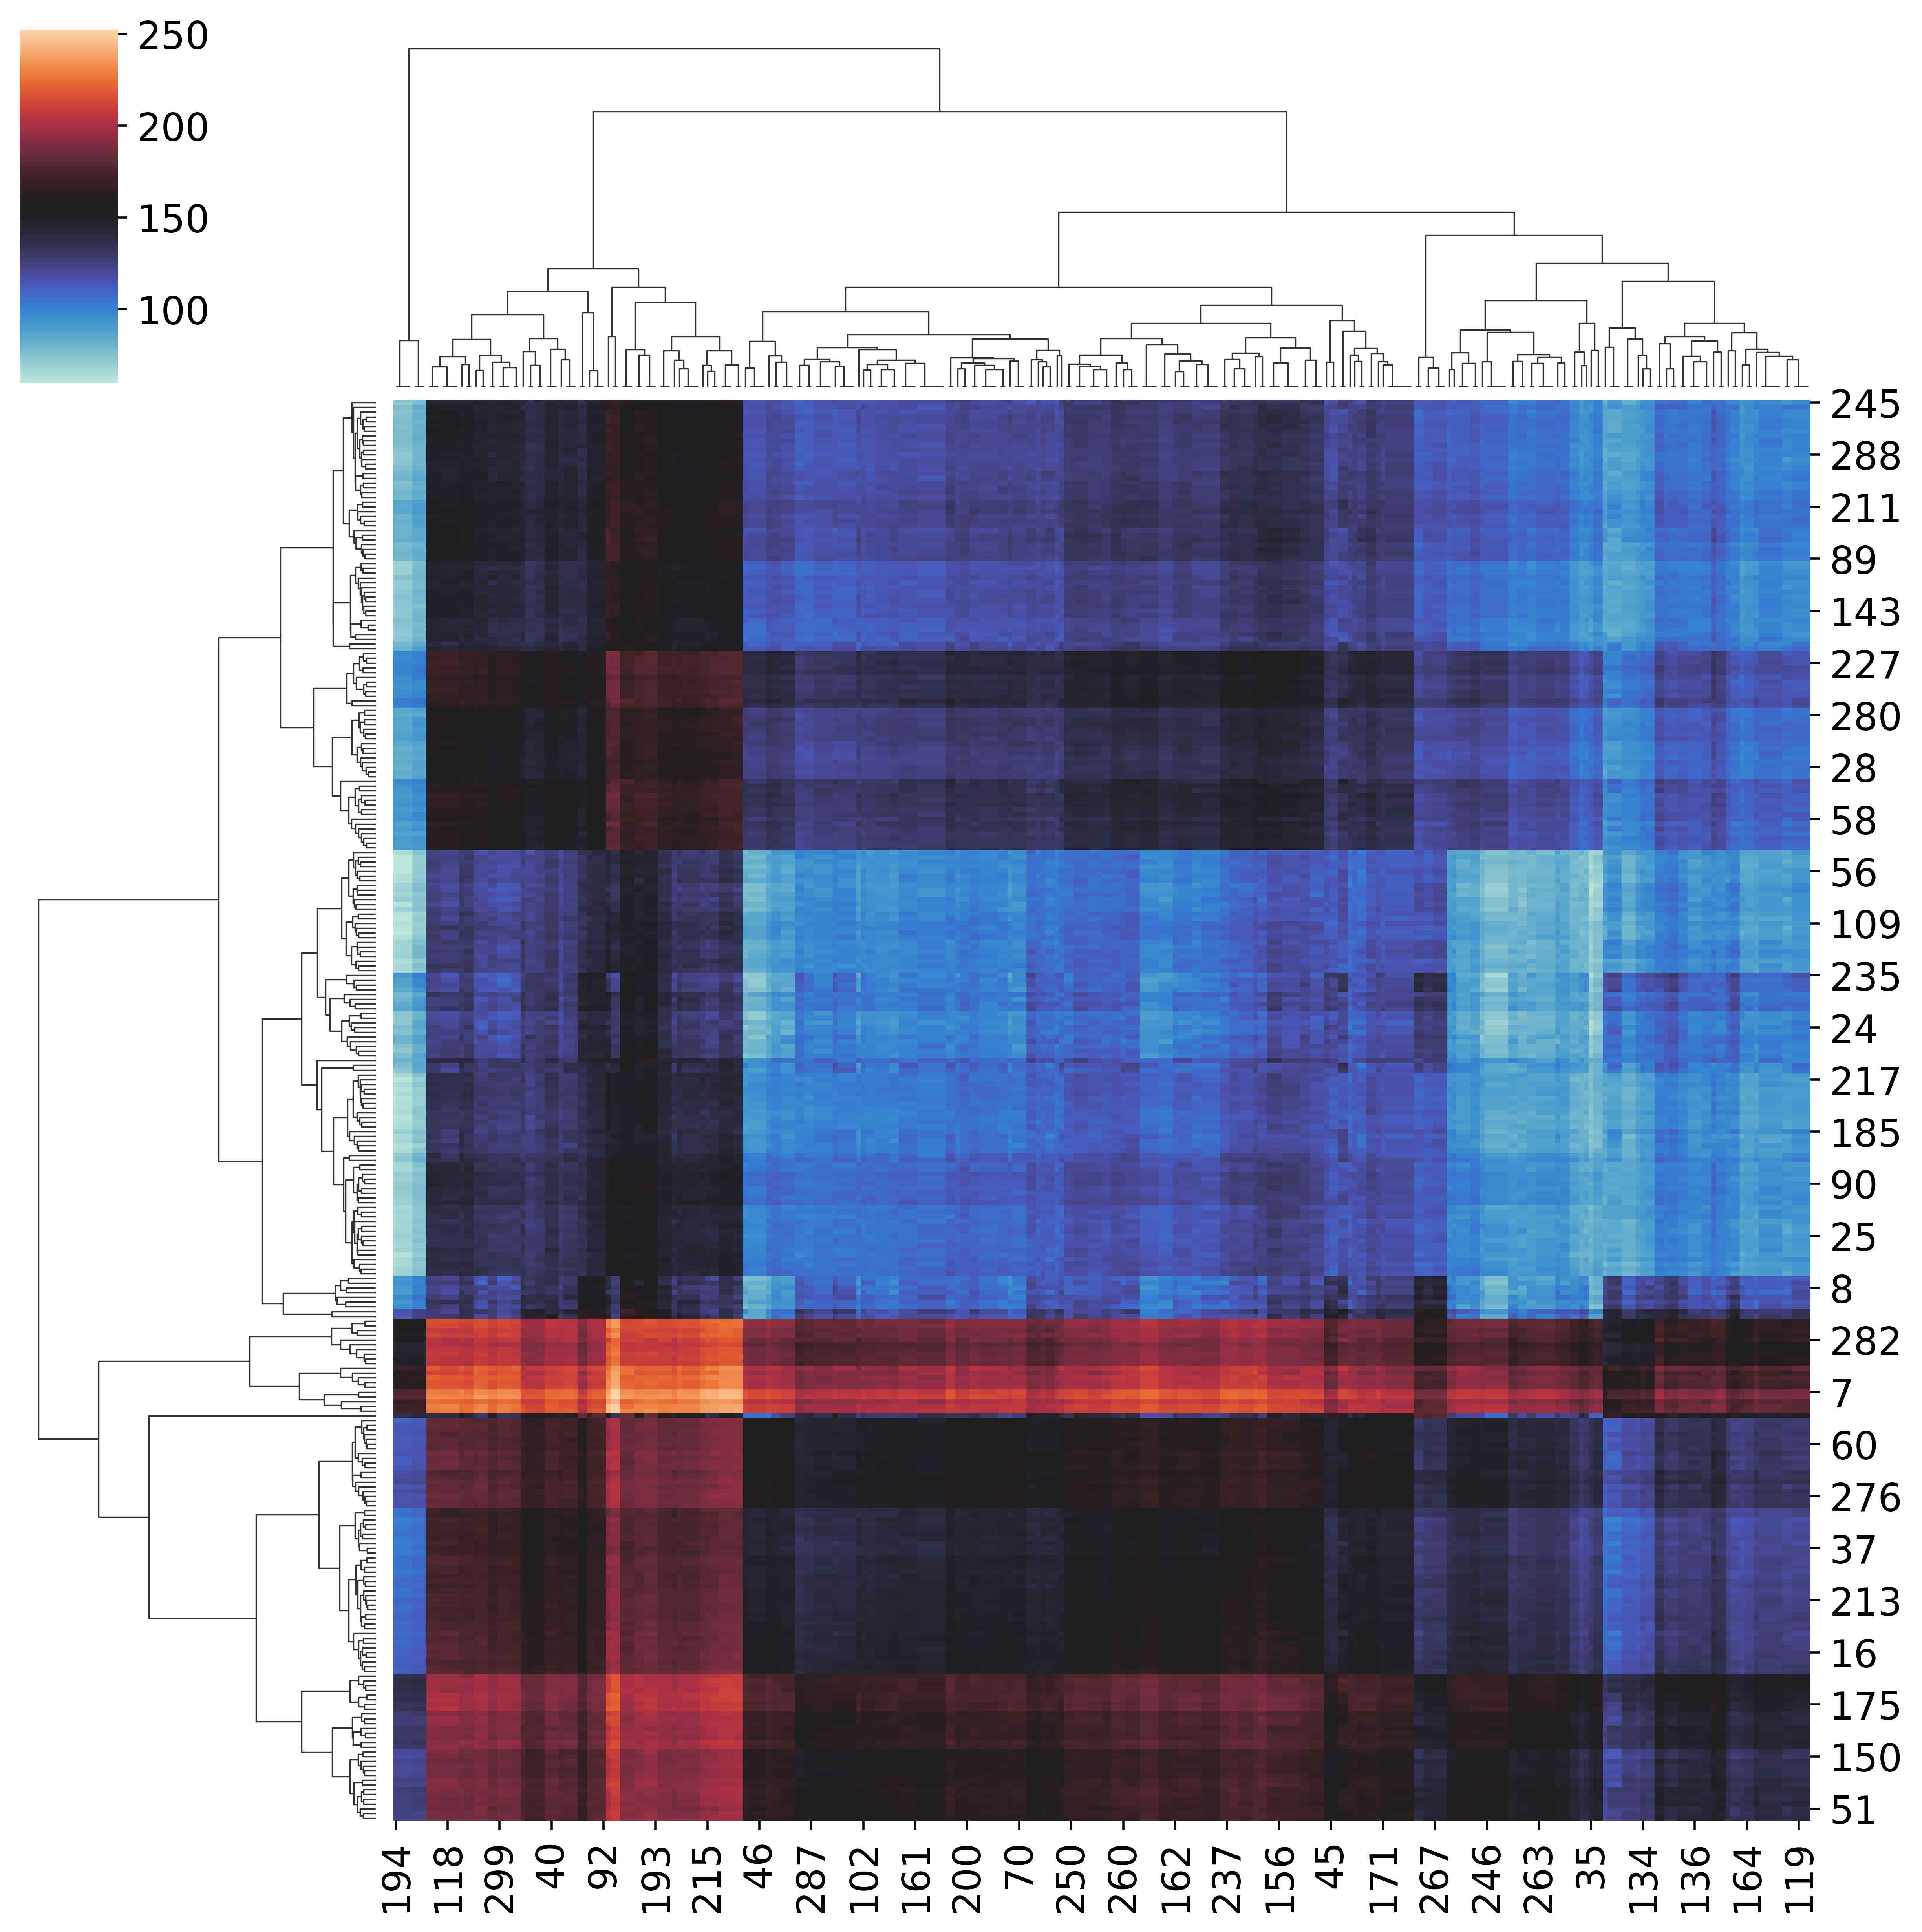

In [679]:
sns.clustermap(Distance_P_R,cmap="icefire")